In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [209]:
병원이동 = pd.read_csv('../../Data/public health/moveHospitalTime.csv', index_col='년도')
병원이동['년도'] = 병원이동.index
병원이동.reset_index(inplace=True,drop=True)
병원 = pd.read_csv('../../Data/public health/hosik_병원수_2009_2022.csv', index_col='시점')
병원['년도'] = 병원.index
병원.reset_index(inplace=True,drop=True)
의료인 = pd.read_csv('../../Data/public health/hosik_의료인_2010_2021.csv', index_col='시점')
의료인['년도'] = 의료인.index
의료인.reset_index(inplace=True,drop=True)
산부인과 = pd.read_csv('../../Data/public health/obgyn.csv', index_col='시점')
산부인과['년도'] = 산부인과.index
산부인과.reset_index(inplace=True,drop=True)
구급차및의료인 = pd.read_csv('../../Data/public health/ambulance(2014_2021).csv', index_col='년도')
구급차및의료인['년도'] = 구급차및의료인.index
구급차및의료인.reset_index(inplace=True,drop=True)
birth = pd.read_csv("../../Data/sangwonKim/출생아수_시도_2013_2021.csv", encoding='euc-kr')
birth.columns = ['년도', '시도별', '출생아수']
people = pd. read_csv("../../Data/sangwonKim/주민등록인구_시도_시_군_구__20230207.csv", encoding='euc-kr')

In [210]:
# 시도별 이름을 바꾸기 위한 변수
preAreaName=[
    '서울','부산','대구', '인천', '광주', '대전', '울산','세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주']
NexAreaName = [
 '서울특별시','부산광역시','대구광역시', '인천광역시','광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도',
 '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']

In [211]:
resultDF = pd.merge(left=병원, right=의료인, how='left',on=['년도', '시도별'])
resultDF.replace(preAreaName,NexAreaName, inplace=True)
resultDF = pd.merge(left=resultDF, right=병원이동, how='left',on=['년도', '시도별'])
resultDF = pd.merge(left=resultDF, right=산부인과, how='left',on=['년도', '시도별'])
구급차및의료인.replace(preAreaName,NexAreaName, inplace=True)
resultDF = pd.merge(left=resultDF, right=구급차및의료인, how='left',on=['년도', '시도별'])
resultDF = pd.merge(left=resultDF, right=birth, how='left',on=['년도', '시도별'])
resultDF.set_index(keys='년도', inplace=True, drop=True)
resultDF

,병원,상급종합병원,종합병원,의원,시도별,의사,치과의사,한의사,약사,간호사,...,종합병원 승용차,산부인과,소아청소년과,구급차 소계,특수구급차,일반구급차,1급 응급구조사,2급 응급구조사,의사/간호사,출생아수
년도,,,,,,,,,,,,,,,,,,,,,
2009,167,17,42,7142,서울특별시,NaN,NaN,NaN,NaN,NaN,...,NaN,459,521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,103,4,22,2065,부산광역시,NaN,NaN,NaN,NaN,NaN,...,NaN,107,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,98,4,7,1460,대구광역시,NaN,NaN,NaN,NaN,NaN,...,NaN,98,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,50,2,12,1313,인천광역시,NaN,NaN,NaN,NaN,NaN,...,NaN,80,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,49,2,17,826,광주광역시,NaN,NaN,NaN,NaN,NaN,...,NaN,49,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,62,2,12,1190,전라북도,NaN,NaN,NaN,NaN,NaN,...,NaN,50,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022,73,1,25,958,전라남도,NaN,NaN,NaN,NaN,NaN,...,NaN,18,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022,56,0,20,1296,경상북도,NaN,NaN,NaN,NaN,NaN,...,NaN,50,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
resultDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 2009 to 2022
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   병원              235 non-null    int64  
 1   상급종합병원          235 non-null    int64  
 2   종합병원            235 non-null    int64  
 3   의원              235 non-null    int64  
 4   시도별             235 non-null    object 
 5   의사              202 non-null    float64
 6   치과의사            202 non-null    float64
 7   한의사             202 non-null    float64
 8   약사              202 non-null    float64
 9   간호사             202 non-null    float64
 10  기타보건의료인         202 non-null    float64
 11  공공의료시설 대중교통/도보  68 non-null     float64
 12  공공의료시설 승용차      68 non-null     float64
 13  병.의원 대중교통/도보    68 non-null     float64
 14  병.의원 승용차        68 non-null     float64
 15  종합병원 대중교통/도보    68 non-null     float64
 16  종합병원 승용차        68 non-null     float64
 17  산부인과            235 non-null   

In [213]:
resultDF2020 = resultDF[resultDF.index==2020]
people2020 = people[['행정구역별','2020']].iloc[2:,:]
people2020.set_index(keys=resultDF2020.index, inplace=True)
resultDF2020['년도'] = resultDF2020.index
resultDF2020.reset_index(inplace=True,drop=True)
people2020['년도'] = people2020.index
people2020.reset_index(inplace=True,drop=True)
people2020.columns = ['시도별','인구수','년도']


In [214]:
merge2020 = pd.merge(left = resultDF2020, right = people2020, how='left', on=['시도별','년도'])
merge2020['인구수']=merge2020['인구수'].astype(int)
merge2020.set_index(keys='년도',inplace=True,drop=True)

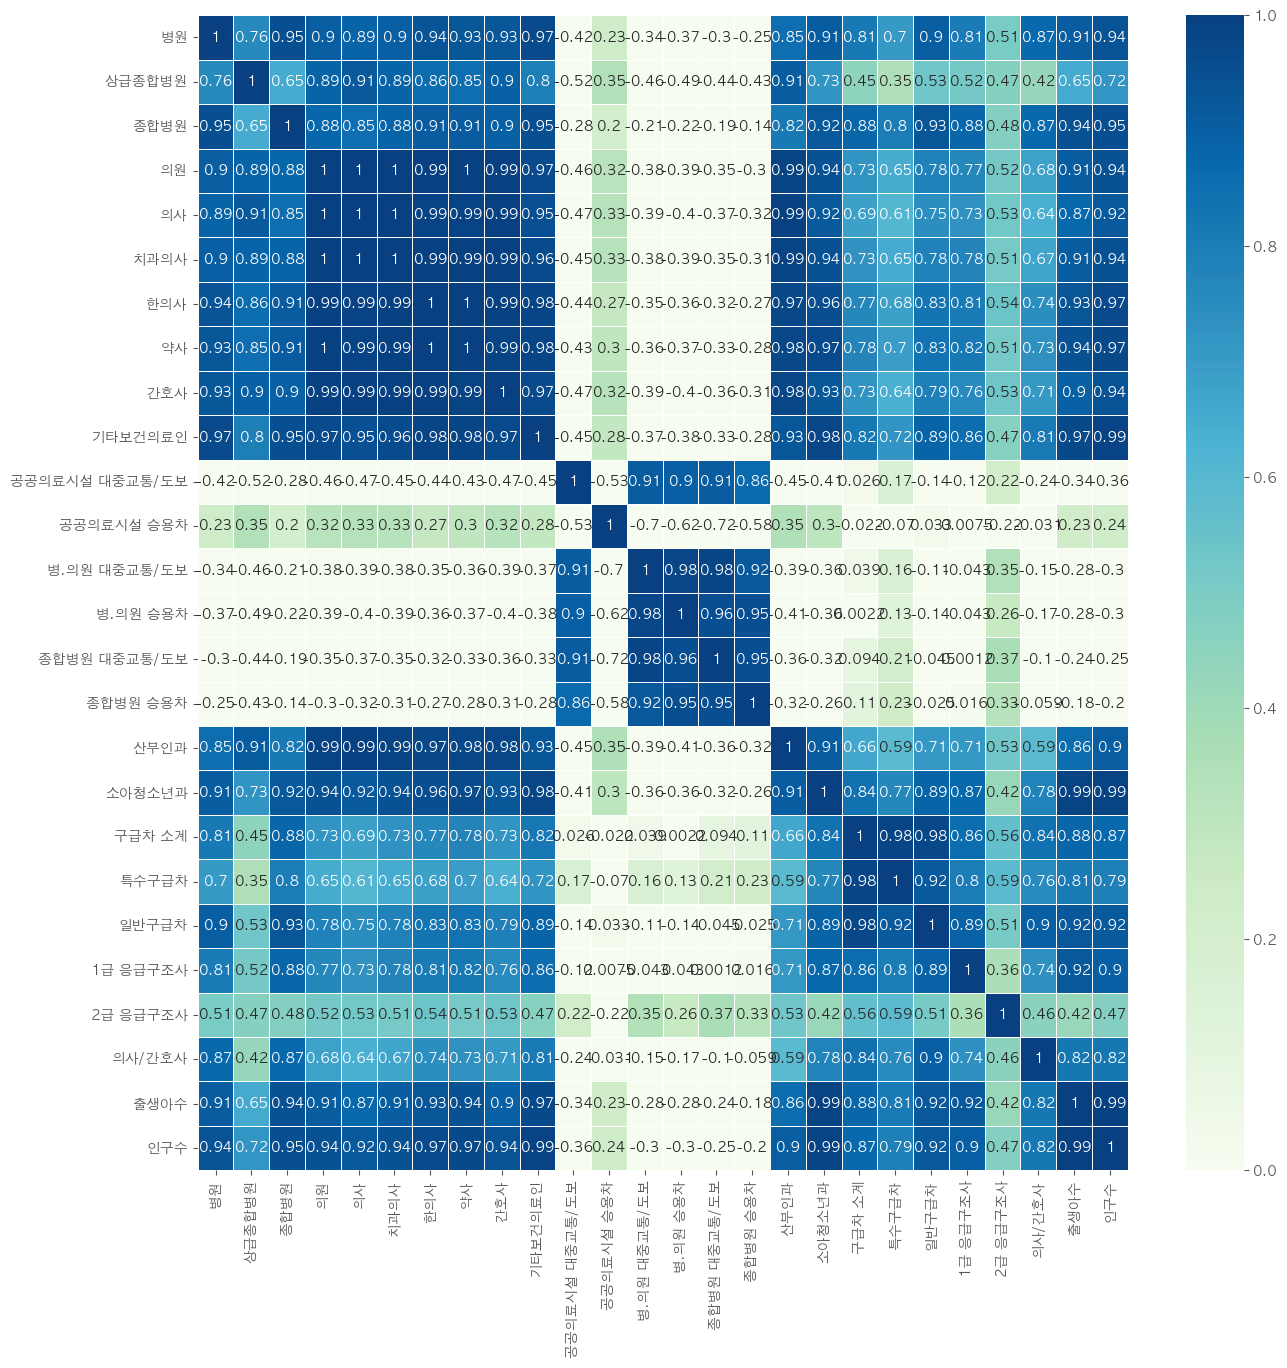

In [215]:
# resultDF[resultDF.index==2020]
plt.figure(figsize=(15,15))
sns.heatmap(
    merge2020.corr(),
    
    annot=True,
    linewidths= 0.5,
    vmax=1, vmin=0,
    cmap='GnBu',
)
plt.show()

In [216]:
merge2020.columns

Index(['병원', '상급종합병원', '종합병원', '의원', '시도별', '의사', '치과의사', '한의사', '약사', '간호사',
       '기타보건의료인', '공공의료시설 대중교통/도보', '공공의료시설 승용차', '병.의원 대중교통/도보', '병.의원 승용차',
       '종합병원 대중교통/도보', '종합병원 승용차', '산부인과', '소아청소년과', '구급차 소계', '특수구급차',
       '일반구급차', '1급 응급구조사', '2급 응급구조사', '의사/간호사', '출생아수', '인구수'],
      dtype='object')

<AxesSubplot: >

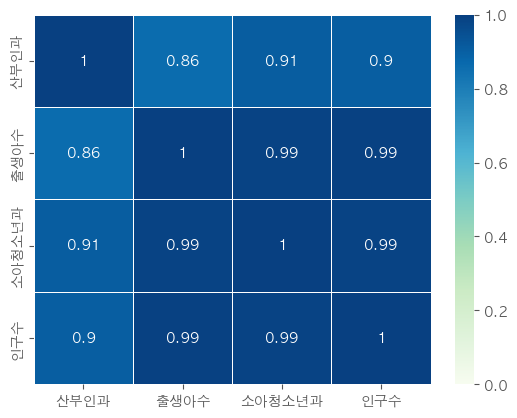

In [217]:
# resultDF[resultDF.index==2020]
sns.heatmap(
    merge2020[['산부인과','출생아수','소아청소년과','인구수']].corr(),
    linewidths= 0.5,
    annot=True, # 숫자가 보임 
    # fmt = 'd',
    cmap='GnBu',
    vmin=0, vmax=1
)

In [218]:
merge2020[['산부인과','출생아수','인구수']].corr()

,산부인과,출생아수,인구수
산부인과,1.000000,0.862262,0.902589
출생아수,0.862262,1.000000,0.993922
인구수,0.902589,0.993922,1.000000


## 전출인구가 처음 임시타겟

In [219]:
pd.DataFrame()

""


In [220]:
tonghab4 = pd.read_csv('../../Data/04.통합.csv')

In [221]:
tonghab4

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,외국인
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,351074
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,325766
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,69628
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,39010
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,24076
...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5,57094
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4,22928
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2,24654
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4,26831


In [222]:
tonghab4 = tonghab4[['년도','시도','전출인구']]
tonghab4.columns = ['년도','시도별','전출인구']

In [223]:
tonghab4

,년도,시도별,전출인구
0,2013,경기도,1821303
1,2013,서울특별시,1620640
2,2013,경상남도,423864
3,2013,부산광역시,496161
4,2013,대구광역시,363224
...,...,...,...
131,2020,충청북도,226441
132,2020,대전광역시,243418
133,2020,강원도,217897
134,2020,제주특별자치도,94736


In [224]:
Newmerge2020 = merge2020[['산부인과','출생아수','인구수','시도별']]
Newmerge2020['년도'] = Newmerge2020.index
Newmerge2020.reset_index(inplace=True, drop=True)
Newmerge2020

,산부인과,출생아수,인구수,시도별,년도
0,385,47445.0,9668465,서울특별시,2020
1,67,15058.0,3391946,부산광역시,2020
2,87,11193.0,2418346,대구광역시,2020
3,60,16040.0,2942828,인천광역시,2020
4,36,7318.0,1450062,광주광역시,2020
5,44,7481.0,1463882,대전광역시,2020
6,34,6617.0,1136017,울산광역시,2020
7,7,3468.0,355831,세종특별자치시,2020
8,265,77737.0,13427014,경기도,2020
9,32,7835.0,1542840,강원도,2020


In [225]:
Newmerge2020 = pd.merge(left = Newmerge2020, right = tonghab4, how='left', on=['시도별','년도'])

In [226]:
Newmerge2020.drop(columns='년도',inplace=True)
Newmerge2020

,산부인과,출생아수,인구수,시도별,전출인구
0,385,47445.0,9668465,서울특별시,1642977
1,67,15058.0,3391946,부산광역시,506176
2,87,11193.0,2418346,대구광역시,364083
3,60,16040.0,2942828,인천광역시,460304
4,36,7318.0,1450062,광주광역시,232246
5,44,7481.0,1463882,대전광역시,243418
6,34,6617.0,1136017,울산광역시,149696
7,7,3468.0,355831,세종특별자치시,65909
8,265,77737.0,13427014,경기도,1984199
9,32,7835.0,1542840,강원도,217897


In [227]:
Newmerge2020['소아청소년과'] = list(merge2020['소아청소년과'])
Newmerge2020

,산부인과,출생아수,인구수,시도별,전출인구,소아청소년과
0,385,47445.0,9668465,서울특별시,1642977,475
1,67,15058.0,3391946,부산광역시,506176,128
2,87,11193.0,2418346,대구광역시,364083,112
3,60,16040.0,2942828,인천광역시,460304,140
4,36,7318.0,1450062,광주광역시,232246,43
5,44,7481.0,1463882,대전광역시,243418,59
6,34,6617.0,1136017,울산광역시,149696,35
7,7,3468.0,355831,세종특별자치시,65909,22
8,265,77737.0,13427014,경기도,1984199,672
9,32,7835.0,1542840,강원도,217897,56


<AxesSubplot: >

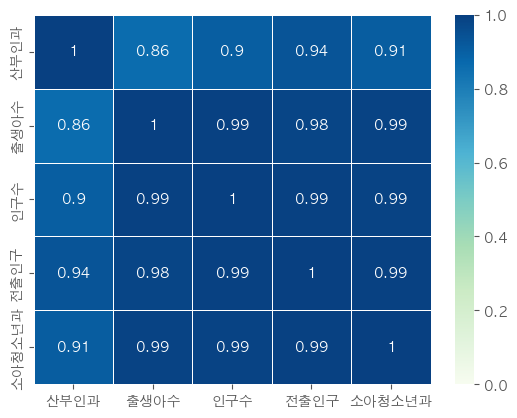

In [228]:
# resultDF[resultDF.index==2020]
sns.heatmap(
    Newmerge2020.corr(),
    linewidths= 0.5,
    annot=True, # 숫자가 보임 
    # fmt = 'd',
    cmap='GnBu',
    vmin=0, vmax=1
)

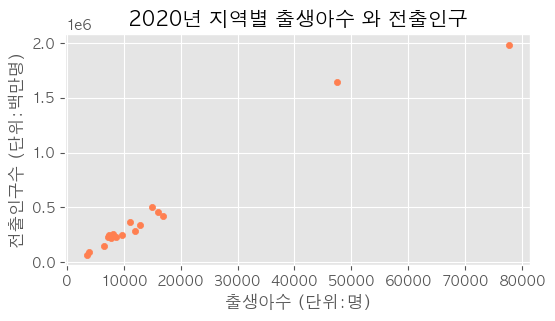

In [229]:
plt.style.use('ggplot')
# plt.style.use('default')
Newmerge2020.plot(
    kind='scatter',
    x = 1,
    y = 4,
    c = 'coral',
    # s = 10, #산점도 점의 크기 
    # s = cylinder_size, #산점도 점의 크기 300은 넘 크다 100으로 줄여야지
    figsize=(6,3)
)
plt.title('2020년 지역별 출생아수 와 전출인구')
plt.xlabel('출생아수 (단위:명)')
plt.ylabel('전출인구수 (단위:백만명)')
# plt.ylim(100000,2000000)
plt.show()

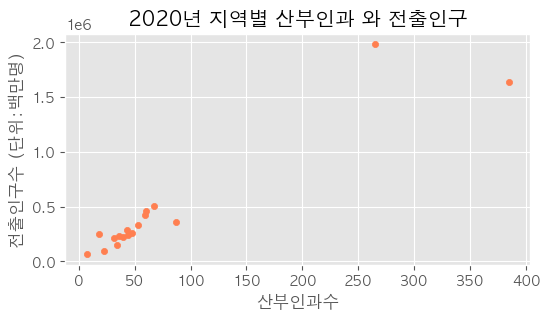

In [230]:
plt.style.use('ggplot')
# plt.style.use('default')
Newmerge2020.plot(
    kind='scatter',
    x = 0,
    y = 4,
    c = 'coral',
    # s = 10, #산점도 점의 크기 
    # s = cylinder_size, #산점도 점의 크기 300은 넘 크다 100으로 줄여야지
    figsize=(6,3)
)
plt.title('2020년 지역별 산부인과 와 전출인구')
plt.xlabel('산부인과수')
plt.ylabel('전출인구수 (단위:백만명)')
# plt.ylim(100000,2000000)
plt.show()

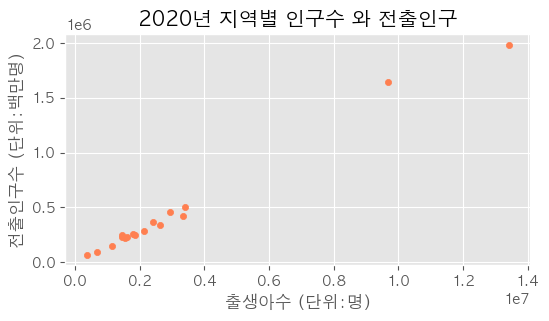

In [231]:
plt.style.use('ggplot')


Newmerge2020.plot(
    kind='scatter',
    x = 2,
    y = 4,
    c = 'coral',
    # s = 10, #산점도 점의 크기 
    # s = cylinder_size, #산점도 점의 크기 300은 넘 크다 100으로 줄여야지
    figsize=(6,3)
)
plt.title('2020년 지역별 인구수 와 전출인구')
plt.xlabel('출생아수 (단위:명)')
plt.ylabel('전출인구수 (단위:백만명)')
# plt.ylim(100000,2000000)
plt.show()

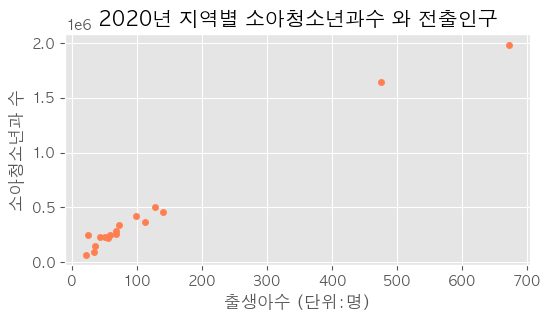

In [232]:
plt.style.use('ggplot')


Newmerge2020.plot(
    kind='scatter',
    x = 5,
    y = 4,
    c = 'coral',
    # s = 10, #산점도 점의 크기 
    # s = cylinder_size, #산점도 점의 크기 300은 넘 크다 100으로 줄여야지
    figsize=(6,3)
)
plt.title('2020년 지역별 소아청소년과수 와 전출인구')
plt.xlabel('출생아수 (단위:명)')
plt.ylabel('소아청소년과 수')
# plt.ylim(100000,2000000)
plt.show()

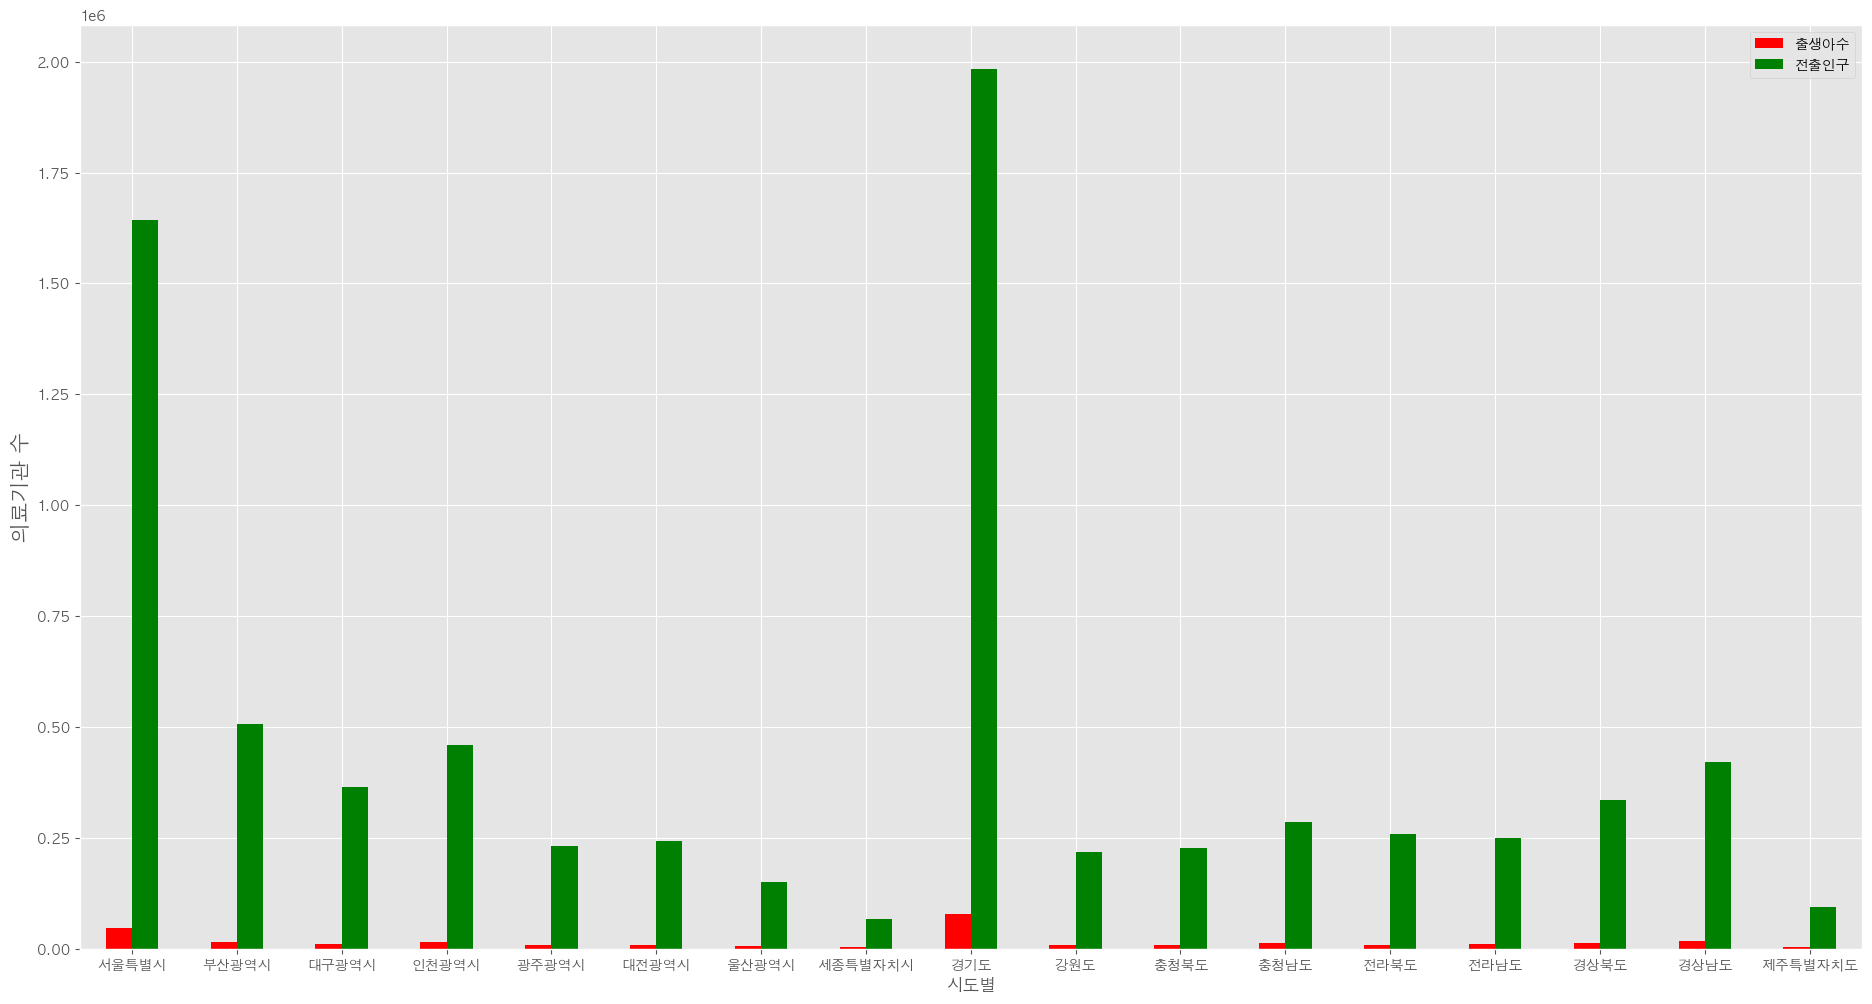

In [233]:
colors = ['red','green','blue','firebrick','black','skyblue','coral','darkviolet','mediumspringgreen','navy','yellow','pink','darkgreen','palevioletred']
# years = [y for y in range(2020,2022)]

plt.style.use('ggplot')
Newmerge2020.set_index(keys='시도별')[['출생아수','전출인구']].plot(
    kind='bar', 
    figsize=(23,12),
    color = colors,
    )
plt.xticks(rotation="horizontal",size=10) # vertical은 90도
plt.ylabel("의료기관 수", size=15)
# plt.title('%d년 시도별 의료기관 현황' %titleYear)
# plt.ylim(0,11000)
plt.show()


In [234]:
Newmerge2020.set_index(keys='시도별')
Newmerge2020['출생아수별 전출인구 비율']= round(Newmerge2020['전출인구'] / Newmerge2020['출생아수'],2)

In [235]:
Newmerge2020['인구수대비 전출인구 비율']= round(Newmerge2020['전출인구'] / Newmerge2020['인구수'] *100,2)

In [236]:
Newmerge2020.sort_values(by='출생아수별 전출인구 비율', ascending=False)

,산부인과,출생아수,인구수,시도별,전출인구,소아청소년과,출생아수별 전출인구 비율,인구수대비 전출인구 비율
0,385,47445.0,9668465,서울특별시,1642977,475,34.63,16.99
1,67,15058.0,3391946,부산광역시,506176,128,33.62,14.92
5,44,7481.0,1463882,대전광역시,243418,59,32.54,16.63
2,87,11193.0,2418346,대구광역시,364083,112,32.53,15.06
4,36,7318.0,1450062,광주광역시,232246,43,31.74,16.02
12,48,8165.0,1804104,전라북도,257577,68,31.55,14.28
3,60,16040.0,2942828,인천광역시,460304,140,28.70,15.64
9,32,7835.0,1542840,강원도,217897,56,27.81,14.12
10,40,8607.0,1600837,충청북도,226441,51,26.31,14.15
14,53,12873.0,2639422,경상북도,334679,73,26.00,12.68


In [237]:
Newmerge2020.sort_values(by='인구수대비 전출인구 비율', ascending=False)

,산부인과,출생아수,인구수,시도별,전출인구,소아청소년과,출생아수별 전출인구 비율,인구수대비 전출인구 비율
7,7,3468.0,355831,세종특별자치시,65909,22,19.00,18.52
0,385,47445.0,9668465,서울특별시,1642977,475,34.63,16.99
5,44,7481.0,1463882,대전광역시,243418,59,32.54,16.63
4,36,7318.0,1450062,광주광역시,232246,43,31.74,16.02
3,60,16040.0,2942828,인천광역시,460304,140,28.70,15.64
2,87,11193.0,2418346,대구광역시,364083,112,32.53,15.06
1,67,15058.0,3391946,부산광역시,506176,128,33.62,14.92
8,265,77737.0,13427014,경기도,1984199,672,25.52,14.78
12,48,8165.0,1804104,전라북도,257577,68,31.55,14.28
10,40,8607.0,1600837,충청북도,226441,51,26.31,14.15


In [238]:
Newmerge2020['인구수대비 출산율'] = Newmerge2020['출생아수'] / Newmerge2020['인구수'] *100
Newmerge2020.sort_values(by='인구수대비 출산율' ,ascending=False)

,산부인과,출생아수,인구수,시도별,전출인구,소아청소년과,출생아수별 전출인구 비율,인구수대비 전출인구 비율,인구수대비 출산율
7,7,3468.0,355831,세종특별자치시,65909,22,19.00,18.52,0.974620
16,23,3989.0,674635,제주특별자치도,94736,34,23.75,14.04,0.591283
6,34,6617.0,1136017,울산광역시,149696,35,22.62,13.18,0.582474
8,265,77737.0,13427014,경기도,1984199,672,25.52,14.78,0.578960
11,43,11950.0,2121029,충청남도,286386,67,23.97,13.50,0.563406
3,60,16040.0,2942828,인천광역시,460304,140,28.70,15.64,0.545054
10,40,8607.0,1600837,충청북도,226441,51,26.31,14.15,0.537656
13,18,9738.0,1851549,전라남도,248770,25,25.55,13.44,0.525938
5,44,7481.0,1463882,대전광역시,243418,59,32.54,16.63,0.511038
9,32,7835.0,1542840,강원도,217897,56,27.81,14.12,0.507830


In [239]:
Newmerge2020['1산부인과수 출산수'] = Newmerge2020['출생아수'] / Newmerge2020['산부인과']
Newmerge2020.sort_values(by='1산부인과수 출산수' ,ascending=False)

,산부인과,출생아수,인구수,시도별,전출인구,소아청소년과,출생아수별 전출인구 비율,인구수대비 전출인구 비율,인구수대비 출산율,1산부인과수 출산수
13,18,9738.0,1851549,전라남도,248770,25,25.55,13.44,0.525938,541.000000
7,7,3468.0,355831,세종특별자치시,65909,22,19.00,18.52,0.974620,495.428571
8,265,77737.0,13427014,경기도,1984199,672,25.52,14.78,0.578960,293.347170
15,59,16823.0,3340216,경상남도,419997,98,24.97,12.57,0.503650,285.135593
11,43,11950.0,2121029,충청남도,286386,67,23.97,13.50,0.563406,277.906977
3,60,16040.0,2942828,인천광역시,460304,140,28.70,15.64,0.545054,267.333333
9,32,7835.0,1542840,강원도,217897,56,27.81,14.12,0.507830,244.843750
14,53,12873.0,2639422,경상북도,334679,73,26.00,12.68,0.487720,242.886792
1,67,15058.0,3391946,부산광역시,506176,128,33.62,14.92,0.443934,224.746269
10,40,8607.0,1600837,충청북도,226441,51,26.31,14.15,0.537656,215.175000


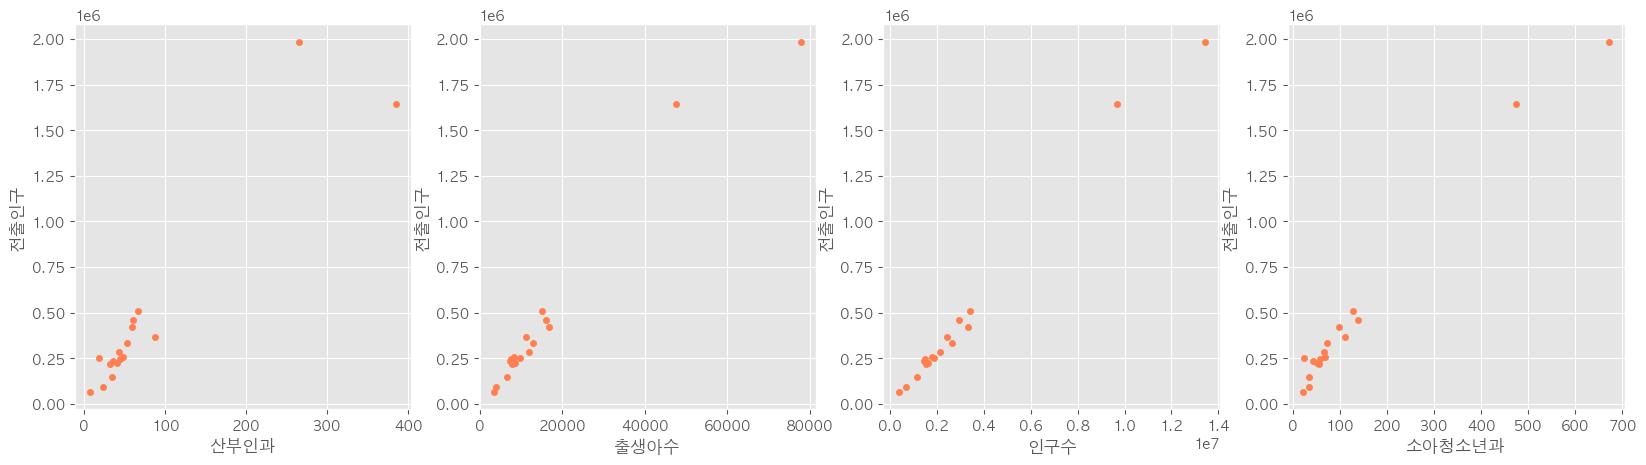

In [240]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

Newmerge2020.plot(
    kind='scatter',
    x = 0,
    y = 4,
    c = 'coral',
    ax = ax1,
)
Newmerge2020.plot(
    kind='scatter',
    x = 1,
    y = 4,
    c = 'coral',
    ax = ax2,
)
Newmerge2020.plot(
    kind='scatter',
    x = 2,
    y = 4,
    c = 'coral',
    ax = ax3,
)
Newmerge2020.plot(
    kind='scatter',
    x = 5,
    y = 4,
    c = 'coral',
    ax = ax4,
)

plt.style.use('ggplot')



# plt.title('2020년 지역별 인구수 와 전출인구')
# plt.xlabel('출생아수 (단위:명)')
# plt.ylabel('전출인구수 (단위:백만명)')
# plt.ylim(100000,2000000)


plt.show()

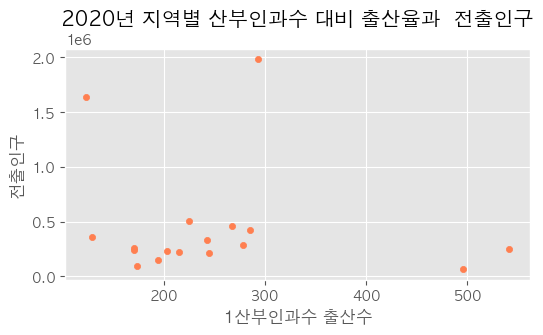

In [241]:
plt.style.use('ggplot')


Newmerge2020.plot(
    kind='scatter',
    x = 9,
    y = 4,
    c = 'coral',
    # s = 10, #산점도 점의 크기 
    # s = cylinder_size, #산점도 점의 크기 300은 넘 크다 100으로 줄여야지
    figsize=(6,3)
)
plt.title('2020년 지역별 산부인과수 대비 출산율과  전출인구')
# plt.xlabel('출생아수 (단위:명)')
# plt.ylabel('소아청소년과 수')
# plt.ylim(100000,2000000)
plt.show()

In [242]:
Newmerge2020.sort_values(by='출생아수', ascending=False)[['출생아수','산부인과','시도별','1산부인과수 출산수']]

,출생아수,산부인과,시도별,1산부인과수 출산수
8,77737.0,265,경기도,293.347170
0,47445.0,385,서울특별시,123.233766
15,16823.0,59,경상남도,285.135593
3,16040.0,60,인천광역시,267.333333
1,15058.0,67,부산광역시,224.746269
14,12873.0,53,경상북도,242.886792
11,11950.0,43,충청남도,277.906977
2,11193.0,87,대구광역시,128.655172
13,9738.0,18,전라남도,541.000000
10,8607.0,40,충청북도,215.175000


In [243]:
sudogwon = Newmerge2020[(Newmerge2020['시도별']=='경기도') | (Newmerge2020['시도별']=='서울특별시')| (Newmerge2020['시도별']=='인천광역시')]
bisudogwon= Newmerge2020[(Newmerge2020['시도별']!='경기도') & (Newmerge2020['시도별']!='서울특별시')& (Newmerge2020['시도별']!='인천광역시')]

In [244]:
bisudogwon[['출생아수','산부인과']].sum(axis=0)

출생아수    131115.0
산부인과       591.0
dtype: float64

In [245]:
sudogwon[['출생아수','산부인과']].sum(axis=0)

출생아수    141222.0
산부인과       710.0
dtype: float64

In [246]:
pd.DataFrame(
    [
    bisudogwon[['출생아수','산부인과']].sum(axis=0),
    sudogwon[['출생아수','산부인과']].sum(axis=0)
    ],
    index = ['비수도권','수도권']
)

,출생아수,산부인과
비수도권,131115.0,591.0
수도권,141222.0,710.0


In [247]:
Newmerge2020.sort_values(by='1산부인과수 출산수', ascending=False)[['출생아수','산부인과','시도별','1산부인과수 출산수']]

,출생아수,산부인과,시도별,1산부인과수 출산수
13,9738.0,18,전라남도,541.000000
7,3468.0,7,세종특별자치시,495.428571
8,77737.0,265,경기도,293.347170
15,16823.0,59,경상남도,285.135593
11,11950.0,43,충청남도,277.906977
3,16040.0,60,인천광역시,267.333333
9,7835.0,32,강원도,244.843750
14,12873.0,53,경상북도,242.886792
1,15058.0,67,부산광역시,224.746269
10,8607.0,40,충청북도,215.175000


In [248]:
Newmerge2020.sort_values(by='출생아수', ascending=True)[['출생아수','산부인과','시도별','1산부인과수 출산수']]

,출생아수,산부인과,시도별,1산부인과수 출산수
7,3468.0,7,세종특별자치시,495.428571
16,3989.0,23,제주특별자치도,173.434783
6,6617.0,34,울산광역시,194.617647
4,7318.0,36,광주광역시,203.277778
5,7481.0,44,대전광역시,170.022727
9,7835.0,32,강원도,244.843750
12,8165.0,48,전라북도,170.104167
10,8607.0,40,충청북도,215.175000
13,9738.0,18,전라남도,541.000000
2,11193.0,87,대구광역시,128.655172


In [249]:
Newmerge2020.sort_values(by='인구수대비 출산율', ascending=True)#[['출생아수','산부인과','시도별','1산부인과수 출산수']]

,산부인과,출생아수,인구수,시도별,전출인구,소아청소년과,출생아수별 전출인구 비율,인구수대비 전출인구 비율,인구수대비 출산율,1산부인과수 출산수
1,67,15058.0,3391946,부산광역시,506176,128,33.62,14.92,0.443934,224.746269
12,48,8165.0,1804104,전라북도,257577,68,31.55,14.28,0.452579,170.104167
2,87,11193.0,2418346,대구광역시,364083,112,32.53,15.06,0.462837,128.655172
14,53,12873.0,2639422,경상북도,334679,73,26.00,12.68,0.487720,242.886792
0,385,47445.0,9668465,서울특별시,1642977,475,34.63,16.99,0.490719,123.233766
15,59,16823.0,3340216,경상남도,419997,98,24.97,12.57,0.503650,285.135593
4,36,7318.0,1450062,광주광역시,232246,43,31.74,16.02,0.504668,203.277778
9,32,7835.0,1542840,강원도,217897,56,27.81,14.12,0.507830,244.843750
5,44,7481.0,1463882,대전광역시,243418,59,32.54,16.63,0.511038,170.022727
13,18,9738.0,1851549,전라남도,248770,25,25.55,13.44,0.525938,541.000000
